In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib
import random
import numpy as np
import pandas as pd
import json
import pprint
from IPython.display import clear_output
from google.colab import drive
from PIL import Image




In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
%cd "/content/gdrive/MyDrive/Colab"

Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab


In [ ]:
path = "/content/gdrive/MyDrive/Colab/data_val"

**Usar la propiedad shape de todas las imagenes**

In [ ]:
for file in os.listdir(path):
  input = os.path.join(path,file)
  im = matplotlib.image.imread(input)
  print(im.shape)


(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)
(512, 640)

**Grafique 10 imágenes de su dataset. Puede utilizar la función plt.imshow() para graficarlas.**

Definimos las rutas de las 10 imagenes a usar

In [ ]:
paths = os.listdir(path)
size = len(paths)
paths = [paths[random.randint(0,size)] for image in range(10)]
paths

['video-k5bTJAiyEgHismN7Y-frame-006647-xJNcaLmmxja3KGt3f.jpg',
 'video-WcRvuoSJHRxDoTmaT-frame-004200-LhMMYsasweAd6ti2k.jpg',
 'video-Qk8msXvMopoYNDdco-frame-002370-dEP5jnfN7xqxzEggR.jpg',
 'video-kBvcuDMtYv2Z4kmXi-frame-003294-aLELL6rXkstiwjyvi.jpg',
 'video-kBvcuDMtYv2Z4kmXi-frame-004137-iySTehtkuKqEJHbvB.jpg',
 'video-JhYLiFCieHQHaY8o7-frame-005721-DZ3xBvtdakRqmMsGE.jpg',
 'video-k5bTJAiyEgHismN7Y-frame-004046-9AD6cpKSWf7ptJa8k.jpg',
 'video-57kWWRyeqqHs3Byei-frame-004421-pYDLi8YuvGCtRuqq7.jpg',
 'video-nMfT5vK8MfEEjQ44W-frame-000600-pPCcc7r4ZWtDF2DMK.jpg',
 'video-zp8ed5vPKfAJ2fKWh-frame-006134-9RsPCsfZ2XzaLHWLZ.jpg']

Guardamos las 10 imagenes en una lista

In [ ]:
images = []
for image in paths:
  input = os.path.join(path,image)
  images.append(matplotlib.image.imread(input))


Mostramos las imagenes

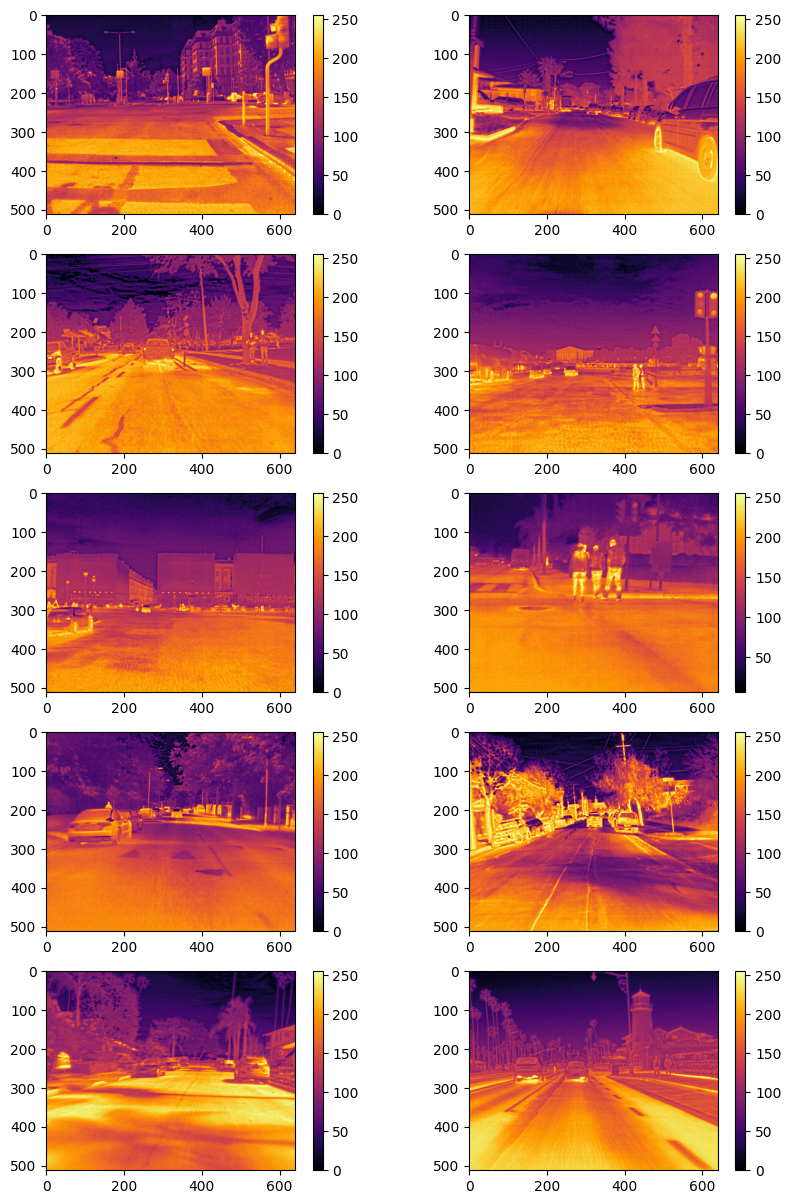

In [ ]:
plt.figure(figsize=(10,15))
i = 1
for image in images:
  plt.subplot(5,2, i)
  plt.imshow(image,cmap = "inferno")
  plt.colorbar()
  i+=1

plt.show()

**Grafique el PROMEDIO de todas las imágenes de su dataset. Puede utilizar np.mean() para calcularlo, y la función plt.imshow() para graficarlo.**

Calcular imagen promedio

In [ ]:
prom = np.zeros((512, 640))
for file in os.listdir(path):
  input = os.path.join(path,file)
  prom += matplotlib.image.imread(input)
prom = prom/size

Mostrar imagen promedio

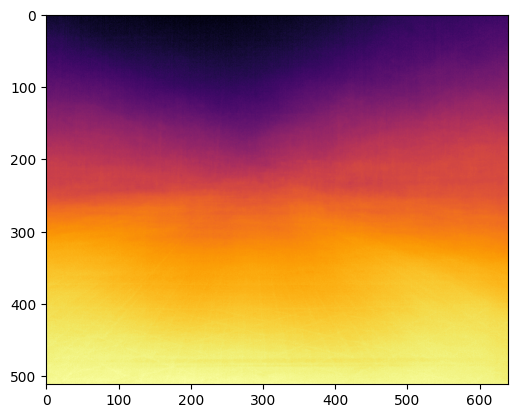

In [ ]:
plt.imshow(prom,cmap="inferno")

**Grafique la DESVIACIÓN ESTÁNDAR de todas las imágenes de su dataset. Puede utilizar np.std() para calcularla, y la función plt.imshow() para graficarla.**

Calcular la desviación estandar

In [ ]:
var = np.zeros((512, 640))
for file in os.listdir(path):
  input = os.path.join(path,file)
  var += np.square(matplotlib.image.imread(input)-prom)
var = var/size
std = np.sqrt(var)

Mostrar la desviación estandar

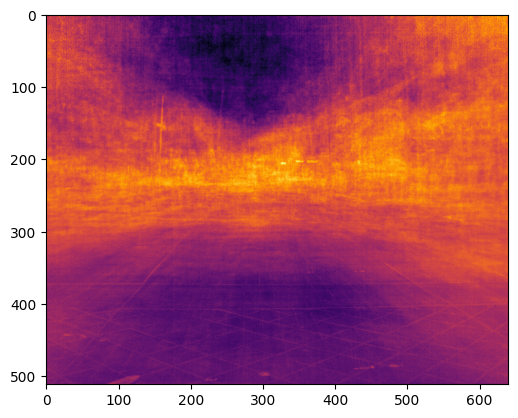

In [ ]:
plt.imshow(std,cmap="inferno")

**Si su tarea será clasificación (casi todos los datasets de imágenes son para clasificación), grafique un "plt.bar"**

Subir los datos del dataframe

In [ ]:
nombres_columnas = ["Label_name", "Count"]
count = pd.read_csv("coco_annotation_counts.tsv", sep='\t', header=None, names=nombres_columnas)
count = count.sort_values(by = "Count", ascending = False)
other = np.sum(count["Count"]) - np.sum(count["Count"][0:4])
other



13971

Grafico de barras

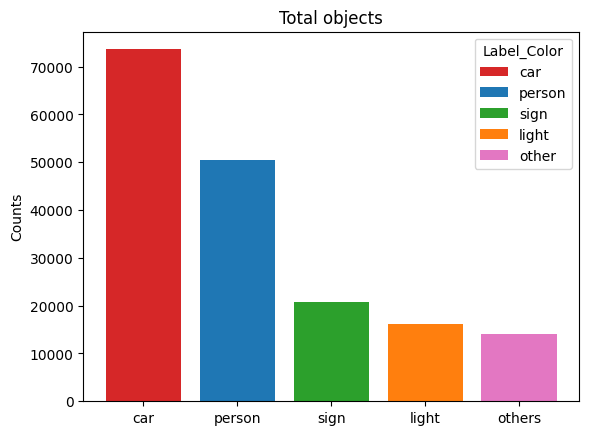

In [ ]:



fig, ax = plt.subplots()

label_name = pd.concat([count["Label_name"][0:4],pd.Series(["others"])])
counts = pd.concat([count["Count"][0:4],pd.Series([other])])

bar_labels = ["car", "person", "sign", "light", "other"]
bar_colors = ["tab:red", "tab:blue", "tab:green", "tab:orange", "tab:pink"]

ax.bar(label_name, counts, color = bar_colors , label = bar_labels)

ax.set_ylabel('Counts')
ax.set_title('Total objects')
ax.legend(title='Label_Color')


plt.show()

**De manera similar, grafique un "plt.pie"**

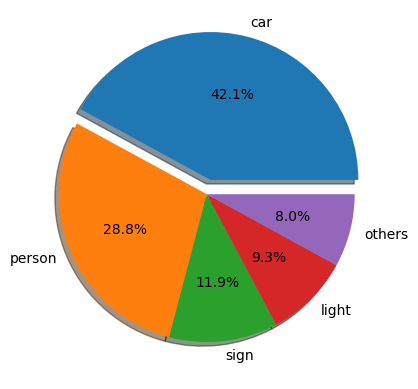

In [ ]:
fig, ax = plt.subplots()
explode = (0.1, 0, 0, 0, 0)
ax.pie(counts,explode=explode, labels=label_name, shadow = True, autopct='%1.1f%%')
plt.show()

## Segunda entrega

# Cutting and resizing

In [ ]:
path = "/content/gdrive/MyDrive/Colab/data"
path_car = "/content/gdrive/MyDrive/Colab/data_car"
path_bus = "/content/gdrive/MyDrive/Colab/data_bus"
path_person = "/content/gdrive/MyDrive/Colab/data_person"
Json_path = "/content/gdrive/MyDrive/Colab/index.json"
csv = "/content/gdrive/MyDrive/Colab/images.csv"


Cargar el Json con los datos de las imagenes

In [ ]:
f = open(Json_path)
data = json.load(f)
for i in data:
    print(i)

datasetId
datasetName
frames
owner
version
videos


In [ ]:
z = data["frames"][0]
pprint.pprint(z)

{'annotations': [{'boundingBox': {'h': 44, 'w': 17, 'x': 533, 'y': 114},
                  'custom': {'color': 'green',
                             'occluded': 'no_(fully_visible)'},
                  'labels': ['light'],
                  'source': {'meta': {'labelboxGeometry': [{'x': 533, 'y': 114},
                                                           {'x': 550, 'y': 114},
                                                           {'x': 533, 'y': 158},
                                                           {'x': 550,
                                                            'y': 158}],
                                      'tool': 'labelbox'},
                             'type': 'human'}},
                 {'boundingBox': {'h': 45, 'w': 15, 'x': 507, 'y': 110},
                  'custom': {'color': 'red', 'occluded': 'no_(fully_visible)'},
                  'labels': ['light'],
                  'source': {'meta': {'labelboxGeometry': [{'x': 507, 'y': 110},
            

## Por razones de rendimiento, esta etapa se hizo en local.

In [ ]:
path = "data"
path_car = "data_car"
path_person = "data_person"
Json_path = "index.json"

Cutting

In [ ]:
f = open(Json_path)
data = json.load(f)
carnum = 0
personnum = 0
#stop = False
for i in data['frames']:

  datasetFrameId = i.get("datasetFrameId")
  videoMetadata = i.get("videoMetadata")
  frameIndex = videoMetadata["frameIndex"]
  videoId = videoMetadata["videoId"]
  address = "video-" + videoId + "-frame-" + str(frameIndex).rjust(6,"0")+ "-" + datasetFrameId + ".jpg"

  input = os.path.join(path,address)
  img = Image.open(input)
  for annotation in i.get("annotations"):
    #if stop:
      #break


      label = annotation["labels"][0]
      if label == "car":
        carnum += 1
        #if carnum > 2245:
          #stop = true
          #break
        boundingBox = annotation.get("boundingBox")
        car = img.crop((boundingBox["x"], boundingBox["y"],boundingBox["x"] + boundingBox["w"], boundingBox["y"] + boundingBox["h"]))
        save_filename = f'car{carnum}.jpg'
        full_path = os.path.join(path_car, save_filename)
        car.save(full_path)

      elif label == "person":
        personnum += 1
        boundingBox = annotation.get("boundingBox")
        person = img.crop((boundingBox["x"], boundingBox["y"],boundingBox["x"] + boundingBox["w"], boundingBox["y"] + boundingBox["h"]))
        save_filename = f'person{personnum}.jpg'
        full_path = os.path.join(path_person, save_filename)
        person.save(full_path)



f.close()

Calcular el tamaño promedio de las imagenes

In [ ]:
x = 0
y = 0
car_num = 0
count = 0
person = os.listdir(path_person)
for p in person:
  count += 1
  input = os.path.join(path_person,p)
  im = Image.open(input)
  x += im.size[0]
  y += im.size[1]
  clear_output()
  print(count)
del person

cars = os.listdir(path_car)
for car in cars:
  car_num += 1
  if car_num > 44527:
    break
  input = os.path.join(path_car,car)
  im = Image.open(input)
  x += im.size[0]
  y += im.size[1]
  clear_output()
  print(car_num)
del cars


In [ ]:
image_shape = (x // (2*44527), y // (2*44527))
print(f'Dimensiones de la imagen promedio: {image_shape}')

Resizing / vectorizing / creating DataFrame

*   PERSONA = 0
*   CARRO = 1



In [ ]:
column_names = [f"Pixel_{i}" for i in range(26 * 33)]
column_names = column_names.append("Category")
df_images = pd.DataFrame(columns=column_names)
count = 0
car_num = 0
person = os.listdir(path_person)
for p in person:
  count += 1
  input = os.path.join(path_person,p)
  im = Image.open(input)
  output = im.resize((26,33))
  arr = ((np.array(output).flatten())/255)
  new_arr = np.append(arr, 0)
  df_row = pd.DataFrame([new_arr], columns=column_names)
  df_images = pd.concat([df_images, df_row], ignore_index=True)
  clear_output()
  print(count)
del person

cars = os.listdir(path_car)
for car in cars:
  car_num += 1
  if car_num > 44527:
    break
  input = os.path.join(path_car,car)
  im = Image.open(input)
  output = im.resize((26,33))
  arr = ((np.array(output).flatten())/255)
  new_arr = np.append(arr, 1)
  df_row = pd.DataFrame([new_arr], columns=column_names)
  df_images = pd.concat([df_images, df_row], ignore_index=True)
  clear_output()
  print(car_num)
del cars
df_images.to_csv('images.csv')


## Entrenamiento

#Imports

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

## Cargar DataFrame

In [ ]:
images = pd.read_csv(csv)
print(images.shape)
X = images.values[:,1:-1]
y = images.values[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)

(89054, 860)


In [ ]:
images.values[:,-1]

array([0., 0., 0., ..., 1., 1., 1.])

##DecisionTreeClassifier

In [ ]:
est = DecisionTreeClassifier(max_depth=10)
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.8632705767863158


**Cross - validation**

**10 iteraciones**

In [ ]:
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))


accuracy 0.869 (+/- 0.00278)


**Leave One Out - Fisicamente imposible**

In [ ]:
#s = cross_val_score(est, X, y, cv=KFold(89054, shuffle=True), scoring=make_scorer(accuracy_score))
#print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

##RandomForestClassifier

In [ ]:
est = RandomForestClassifier()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9156342403712991


**Cross-Validation**

**10 iteraciones**

In [ ]:
s = cross_val_score(est, X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.921 (+/- 0.00343)


**Leave One Out - Fisicamente imposible**

In [ ]:
#s = cross_val_score(est, X, y, cv=KFold(89054, shuffle=True), scoring=make_scorer(accuracy_score))
#print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

##Support vector machine (SVM)

In [ ]:
est = SVC()
est.fit(X_train,y_train)
print(accuracy_score(est.predict(X_test), y_test))

0.9271250514653592


**Cross-Validation**

**10 iteraciones**

La cross-validation la calculamos en local

In [ ]:
s = cross_val_score(SVC(), X, y, cv=KFold(10, shuffle=True), scoring=make_scorer(accuracy_score))
print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

accuracy 0.933 (+/- 0.00265)

**Leave One Out - Fisicamente imposible**

In [ ]:
#s = cross_val_score(est, X, y, cv=KFold(89054, shuffle=True), scoring=make_scorer(accuracy_score))
#print("accuracy %.3f (+/- %.5f)"%(np.mean(s), np.std(s)))

##Tercera entrega

# Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras

#DNN

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[858]),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 858)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               109952    
                                                                 
 dense_9 (Dense)             (None, 2)                 258       
                                                                 
Total params: 110210 (430.51 KB)
Trainable params: 110210 (430.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Training

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),  #AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1949/1949 [==============================] - 14s 7ms/step - loss: 0.2642 - accuracy: 0.8831
Epoch 2/10
1949/1949 [==============================] - 10s 5ms/step - loss: 0.2581 - accuracy: 0.8866
Epoch 3/10
1949/1949 [==============================] - 10s 5ms/step - loss: 0.2525 - accuracy: 0.8899
Epoch 4/10
1949/1949 [==============================] - 9s 5ms/step - loss: 0.2466 - accuracy: 0.8930
Epoch 5/10
1949/1949 [==============================] - 10s 5ms/step - loss: 0.2422 - accuracy: 0.8941
Epoch 6/10
1949/1949 [==============================] - 10s 5ms/step - loss: 0.2377 - accuracy: 0.8974
Epoch 7/10
1949/1949 [==============================] - 9s 5ms/step - loss: 0.2331 - accuracy: 0.8992
Epoch 8/10
1949/1949 [==============================] - 10s 5ms/step - loss: 0.2297 - accuracy: 0.9006
Epoch 9/10
1949/1949 [==============================] - 10s 5ms/step - loss: 0.2242 - accuracy: 0.9044
Epoch 10/10
1949/1949 [==============================] - 10s 5ms/step - los

#Testing


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

835/835 [==============================] - 2s 2ms/step - loss: 0.2195 - accuracy: 0.9052
Test accuracy: 0.905228853225708


# New DNN

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten( input_shape=[858]),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 858)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               109952    
                                                                 
 dense_15 (Dense)            (None, 256)               33024     
                                                                 
 dense_16 (Dense)            (None, 512)               131584    
                                                                 
 dense_17 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 275586 (1.05 MB)
Trainable params: 275586 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Training

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),  #AdamOptimizer(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1949/1949 [==============================] - 14s 6ms/step - loss: 0.3597 - accuracy: 0.8297
Epoch 2/10
1949/1949 [==============================] - 10s 5ms/step - loss: 0.3061 - accuracy: 0.8572
Epoch 3/10
1949/1949 [==============================] - 9s 5ms/step - loss: 0.2896 - accuracy: 0.8673
Epoch 4/10
1949/1949 [==============================] - 10s 5ms/step - loss: 0.2806 - accuracy: 0.8718
Epoch 5/10
1949/1949 [==============================] - 11s 6ms/step - loss: 0.2713 - accuracy: 0.8777
Epoch 6/10
1949/1949 [==============================] - 10s 5ms/step - loss: 0.2635 - accuracy: 0.8833
Epoch 7/10
1949/1949 [==============================] - 9s 5ms/step - loss: 0.2577 - accuracy: 0.8864
Epoch 8/10
1949/1949 [==============================] - 10s 5ms/step - loss: 0.2514 - accuracy: 0.8894
Epoch 9/10
1949/1949 [==============================] - 10s 5ms/step - loss: 0.2472 - accuracy: 0.8919
Epoch 10/10
1949/1949 [==============================] - 9s 5ms/step - loss

# Testing

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

835/835 [==============================] - 3s 3ms/step - loss: 0.2439 - accuracy: 0.8941
Test accuracy: 0.8941497802734375
